In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/home/admin/Downloads/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.shape

(4340, 8)

In [7]:
X=data.drop('selling_price',axis=1)

In [8]:
y=data.selling_price

In [9]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner


In [10]:
X.drop('name',axis=1,inplace=True)

In [11]:
#y.

In [12]:
X=pd.get_dummies(X)

In [13]:
X

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()


mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)

print(mean_mse)

-183526883934.57465


In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [16]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-183429228016.31784


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [18]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-183395540238.7131


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

<AxesSubplot: xlabel='selling_price', ylabel='Density'>

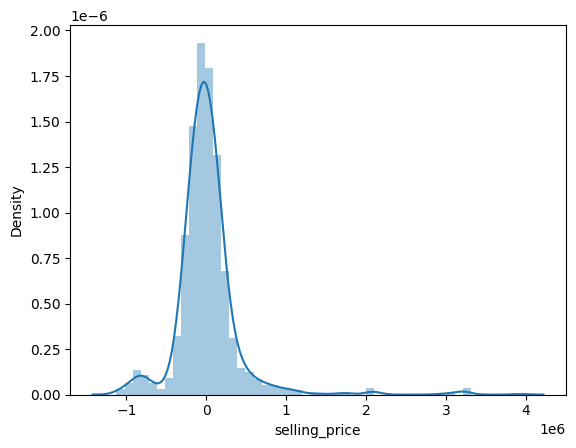

In [21]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

<AxesSubplot: xlabel='selling_price', ylabel='Density'>

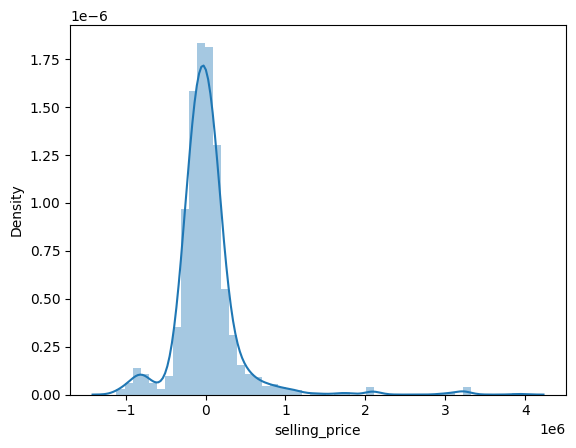

In [22]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf=RandomForestRegressor()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
pred=rf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,r2_score

In [29]:
rf.score(X_test,y_test)

0.6298387051612964

In [30]:
r2_score(y_test,pred)

0.6298387051612964

In [31]:
pred

array([ 681830.        , 1570950.        ,  315389.95      , ...,
        208657.0952381 ,  322764.23837879,  307632.85714286])

In [32]:
y_test.values

array([ 465000, 1580000,  150000, ...,  120000,  350000,  300000])

In [33]:
df=pd.read_excel('/home/admin/Downloads/Boston_Housing.xlsx')

In [34]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
X=df.drop('Price',axis=1)

y=df['Price']

In [36]:
reg=LinearRegression()

In [37]:
mse=cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

In [38]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [39]:
mean_mse=np.mean(mse)
mean_mse

-37.13180746769887

In [40]:
lasso=Lasso()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',verbose=1,cv=10,return_train_score=True)


In [41]:
lasso_reg.fit(X,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [42]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.01}
-34.45554381307912


In [43]:
ridge=Ridge()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',verbose=1,cv=10,return_train_score=True)


In [44]:
ridge_reg.fit(X,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [45]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 100}
-29.61522009733512


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
pred_lasso=lasso_reg.predict(X_test)
pred_ridge=ridge_reg.predict(X_test)

In [48]:
print(f'lasso score {r2_score(y_test,pred_lasso)}')
print(f'ridge score {r2_score(y_test,pred_ridge)}')

lasso score 0.7876461804057326
ridge score 0.7445077718365023
